###   获取SDSS的PCA重构光谱

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results

In [2]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

###  下载 SDSS 数据

获取sdss校正的光谱

光谱  sdss校正光谱  重建光谱

波长  ssss校正光谱  计算波长

In [3]:
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

downloading PCA-processed SDSS spectra from https://github.com/astroML/astroML-data/raw/master/datasets/spec4000.npz to C:\Users\Administrator\astroML_data
[=========================================]  27.15Mb / 27.15Mb   


In [12]:
# evals = pca.explained variance ratio 

data['evals'][:10]

array([9.2188092 , 6.79081546, 4.39605762, 3.59938812, 2.18198917,
       2.11719642, 1.66749368, 1.45302852, 0.95731185, 0.81071005])

In [4]:
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra.mean(0)

In [5]:
spec = spectra[1]
coeff = np.dot(evecs, spec - spec_mean)

In [6]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

<Figure size 360x360 with 0 Axes>

### 画图

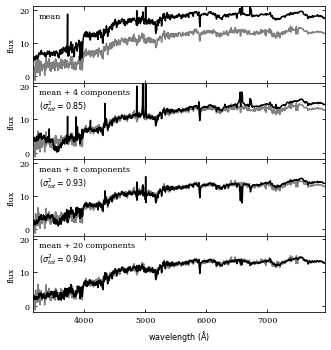

In [7]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()